# Introduction
 - we have to find out the impact of each marketing strategy for each company

### 1. Data Loading and Quality Check

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import scipy.stats


# turn off warnings
import warnings
warnings.filterwarnings('ignore')


In [58]:
file = pd.read_csv('G:\Work\Data analyst\campagin project python\Campaign-Data.csv')
file.isnull().any()

Client ID                False
Client Type              False
Number of Customers      False
Montly Target            False
Zip Code                 False
Calendardate             False
Amount Collected         False
Unit Sold                False
Campaign (Email)         False
Campaign (Flyer)         False
Campaign (Phone)         False
Sales Contact 1          False
Sales Contact 2          False
Sales Contact 3          False
Sales Contact 4          False
Sales Contact 5          False
Number of Competition    False
dtype: bool

In [59]:
file.columns

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')

- Here `amount collected` is the target column
- `  'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5'` these are the feature to work on

### 2. Feature Engineering

In [60]:
# extracting time from the dataset
file['Calendardate'] = pd.to_datetime(file['Calendardate'])
file['year'] = file['Calendardate'].dt.year
file['month'] = file['Calendardate'].dt.month

### 3. EDA

In [61]:
file.groupby('year')['Number of Customers','Amount Collected'].sum()

,Number of Customers,Amount Collected
year,,
2014,2167920,12419131028
2015,2167920,38185960072


In [62]:
file.groupby('Client Type')['Amount Collected','Number of Customers'].sum()

,Amount Collected,Number of Customers
Client Type,,
Large Facility,27358365140,1888992
Medium Facility,20543023704,1986144
Private Facility,1327984928,105792
Small Facility,1375717328,354912


In [63]:
file["Client Type"].value_counts(normalize=True)

Large Facility      0.459677
Small Facility      0.282258
Medium Facility     0.169355
Private Facility    0.088710
Name: Client Type, dtype: float64

In [64]:
# bujhi nai, study
pd.crosstab(file['Client Type'],file['Number of Competition'],margins=True,normalize='columns')

Number of Competition,High,Low,All
Client Type,,,
Large Facility,0.459677,0.459677,0.459677
Medium Facility,0.169355,0.169355,0.169355
Private Facility,0.088710,0.088710,0.088710
Small Facility,0.282258,0.282258,0.282258


In [65]:
pd.crosstab(file['Client Type'],file['Number of Competition'],normalize=True)

Number of Competition,High,Low
Client Type,,
Large Facility,0.076613,0.383065
Medium Facility,0.028226,0.141129
Private Facility,0.014785,0.073925
Small Facility,0.047043,0.235215


In [66]:
file.groupby('Number of Competition')['Amount Collected'].mean()

Number of Competition
High    2.974789e+07
Low     1.445570e+07
Name: Amount Collected, dtype: float64

In [67]:
file.groupby('Client Type')['Amount Collected'].mean()

Client Type
Large Facility      1.999880e+07
Medium Facility     4.075997e+07
Private Facility    5.030246e+06
Small Facility      1.637759e+06
Name: Amount Collected, dtype: float64

- So it is seen that, medium facility has the largest earning.

### 4. Correlations

<AxesSubplot:>

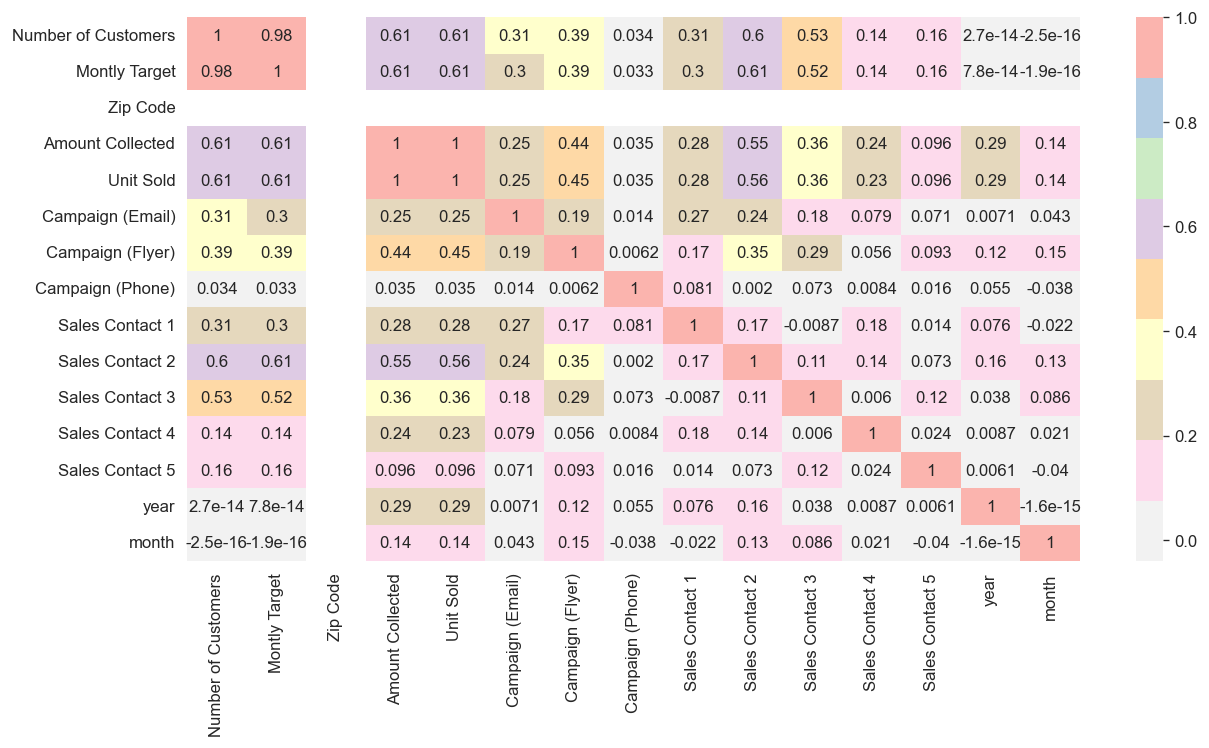

In [76]:
# Overall correaltion in the data

plt.figure(figsize=(12,6),dpi=120)
sns.heatmap(file.corr(),cmap='Pastel1_r', annot=True)

<AxesSubplot:>

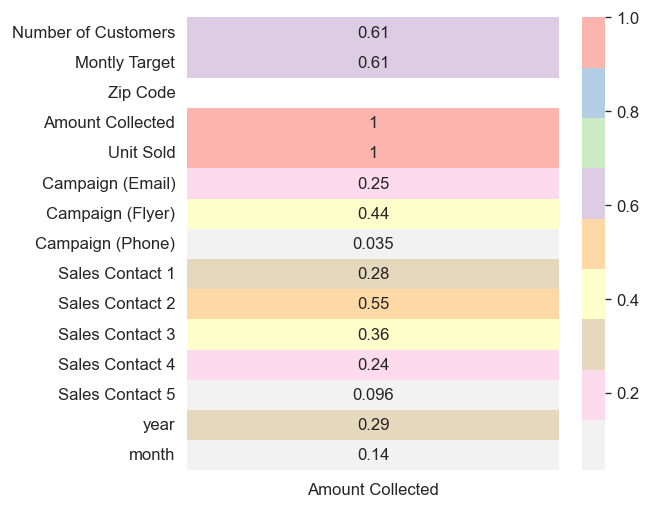

In [69]:
plt.figure(figsize=(5,5),dpi=120)
sns.heatmap(file.corr()[["Amount Collected"]],cmap='Pastel1_r', annot=True)

In [73]:
# correlation with respect to the type of client

correlation_analysis=pd.DataFrame(file.groupby('Client Type')[['Amount Collected',
                                                               'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
                                                               'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
                                                               'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()
correlation_analysis=correlation_analysis.sort_values(['Client Type','Amount Collected'],ascending=False)
correlation_analysis.columns=['Acc Type','Variable Impact on Sales','Impact']
correlation_analysis=correlation_analysis[correlation_analysis['Variable Impact on Sales']!='Amount Collected'].reset_index(drop=True)
correlation_analysis.style.background_gradient(cmap='Pastel1').set_precision(2)

,Acc Type,Variable Impact on Sales,Impact
0,Small Facility,Sales Contact 2,0.22
1,Small Facility,Sales Contact 3,0.07
2,Small Facility,Campaign (Email),0.06
3,Small Facility,Campaign (Flyer),0.04
4,Small Facility,Sales Contact 4,0.02
5,Small Facility,Sales Contact 5,0.00
6,Small Facility,Sales Contact 1,-0.02
7,Small Facility,Campaign (Phone),nan
8,Private Facility,Sales Contact 2,0.57
9,Private Facility,Campaign (Flyer),0.28


### Regression Analysis
- Market Sales and Strategy

In [81]:
import statsmodels.formula.api as smf
# file.columns=[mystring.replace(" ", "_") for mystring in file.columns]
# file.columns=[mystring.replace("(", "") for mystring in file.columns]
# file.columns=[mystring.replace(")", "") for mystring in file.columns]
results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5',data=file).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:52:00   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05     